heading

In [75]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Dosyanın yolunu belirleme
file_path = "data/carclaims.csv"

# CSV dosyasını yükleme
df = pd.read_csv(file_path)

# İlk 5 satırı görüntüleme
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


veri keşfi

In [76]:
#check rows and Columns
print(f"This dataframe contain {df.shape[0]} rows")
print(f"This dataframe contain {df.shape[1]} columns")

# Veri setinin genel bilgilerini incele.
print(df.info())

# Eksik değerleri kontrol et
print(df.isnull().sum())

# Tekrar eden satırları kontrol et
print (df.duplicated().sum())



This dataframe contain 15420 rows
This dataframe contain 33 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice      

veri dağılımı

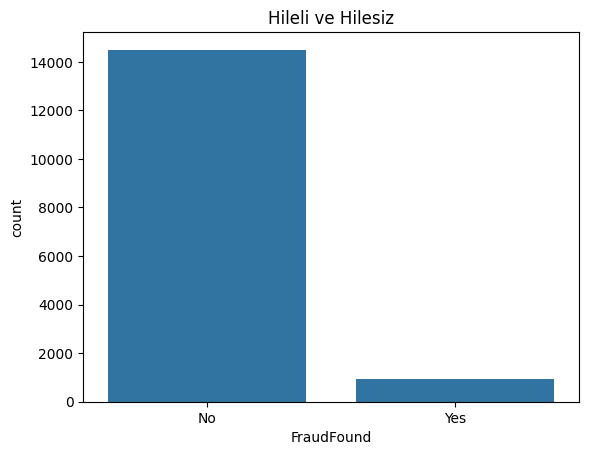

In [77]:
# Veri setindeki kategorik sütunları inceleme
sns.countplot(x=df['FraudFound'])
plt.title("Hileli ve Hilesiz")
plt.show()

In [78]:
number_fraud = (df['FraudFound'] == 'Yes').sum()  # Count fraud cases
number_not_fraud = (df['FraudFound'] == 'No').sum()  # Count non-fraud cases
print("Hileli: ", number_fraud)
print("Hilesiz: ", number_not_fraud)

Hileli:  923
Hilesiz:  14497


In [79]:
#Check Minority class 
percent = (number_fraud / df.shape[0]) * 100
print(f"hileli oranı {percent:.2f}")

hileli oranı 5.99


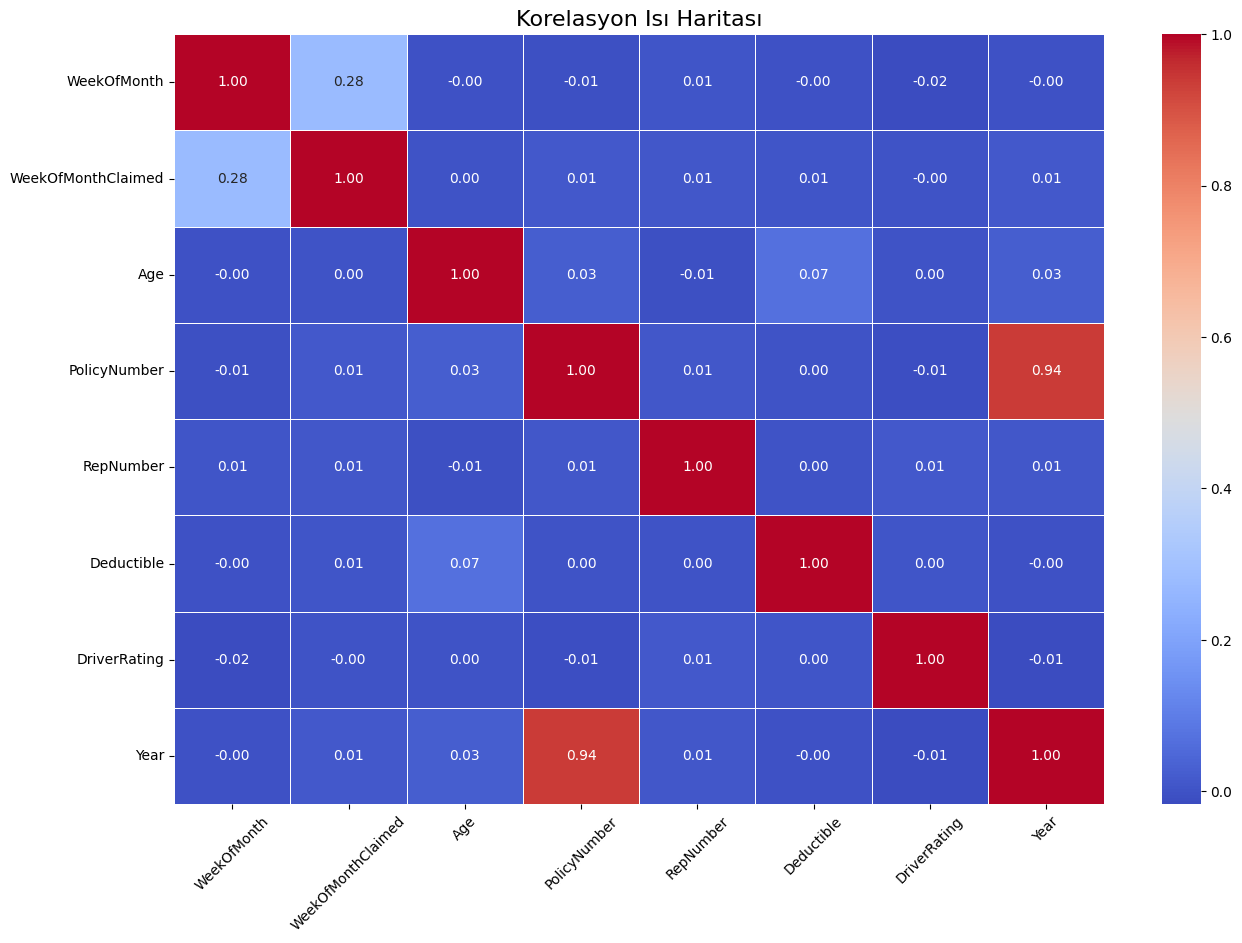

In [80]:
plt.figure(figsize=(15, 10))  # Grafik boyutunu artır
numerical_df = df.select_dtypes(include=['number'])  # Sadece sayısal sütunları seç
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # Çizgiler ekle ve formatı ayarla
plt.xticks(rotation=45)  # X ekseni etiketlerini döndür
plt.yticks(rotation=0)  # Y ekseni etiketlerini düz tut
plt.title("Korelasyon Isı Haritası", fontsize=16)  # Başlık ekle
plt.show()

<Axes: xlabel='Month', ylabel='count'>

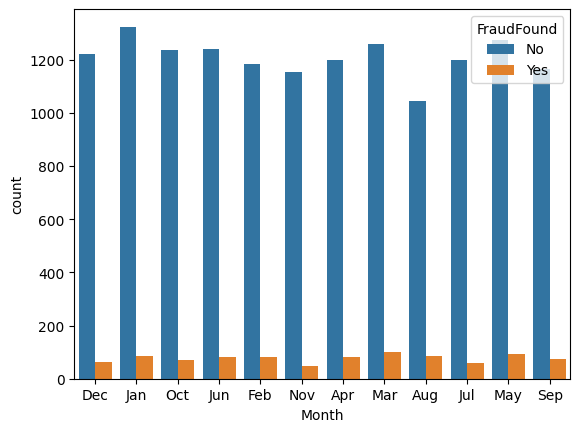

In [81]:
sns.countplot(data=df, x='Month', hue='FraudFound')


<Axes: xlabel='WeekOfMonth', ylabel='count'>

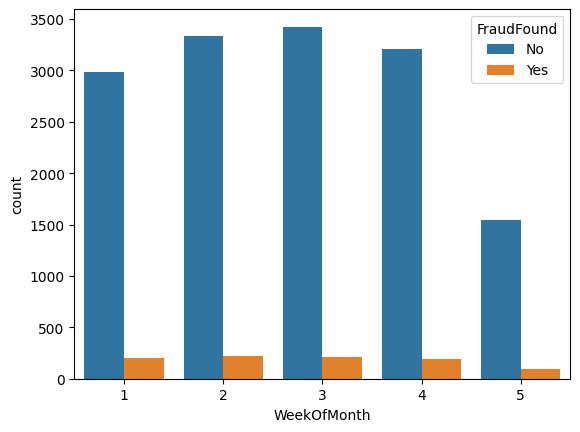

In [82]:
sns.countplot(data=df, x='WeekOfMonth', hue='FraudFound')

<Axes: xlabel='DayOfWeek', ylabel='count'>

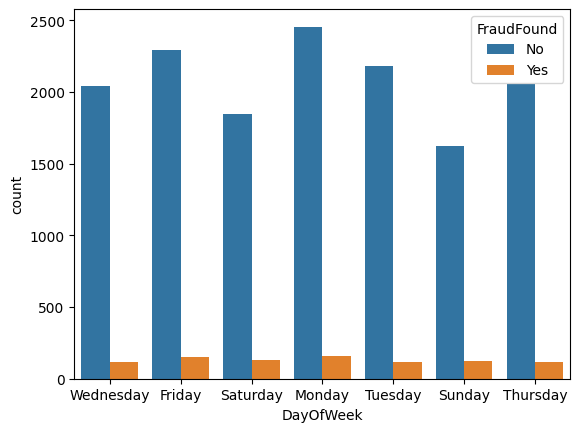

In [83]:
sns.countplot(data=df, x='DayOfWeek', hue='FraudFound')

<Axes: xlabel='count', ylabel='Make'>

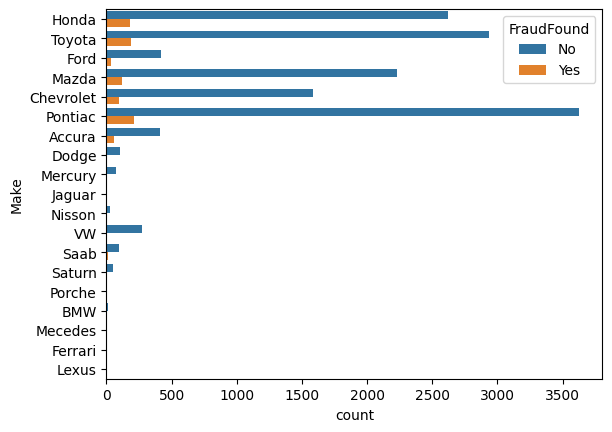

In [84]:
sns.countplot(data=df, y='Make', hue='FraudFound')

<Axes: xlabel='count', ylabel='AccidentArea'>

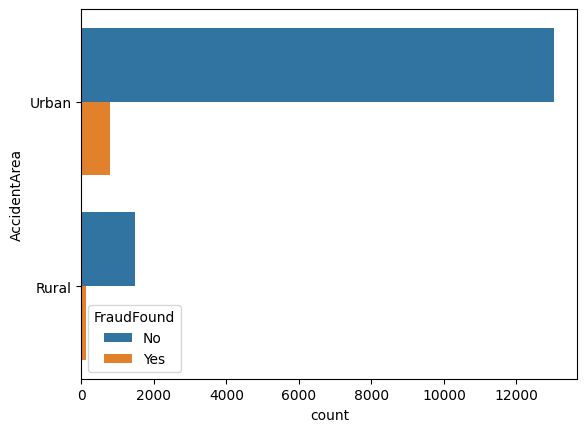

In [85]:
sns.countplot(data=df, y='AccidentArea', hue='FraudFound')

<Axes: xlabel='count', ylabel='DayOfWeekClaimed'>

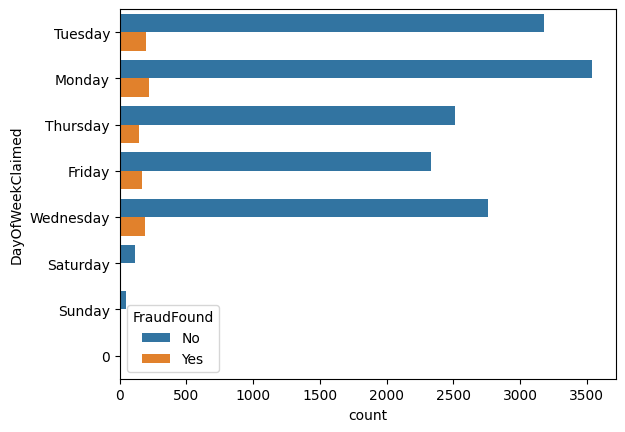

In [86]:
sns.countplot(data=df, y='DayOfWeekClaimed', hue='FraudFound')


<Axes: xlabel='count', ylabel='MonthClaimed'>

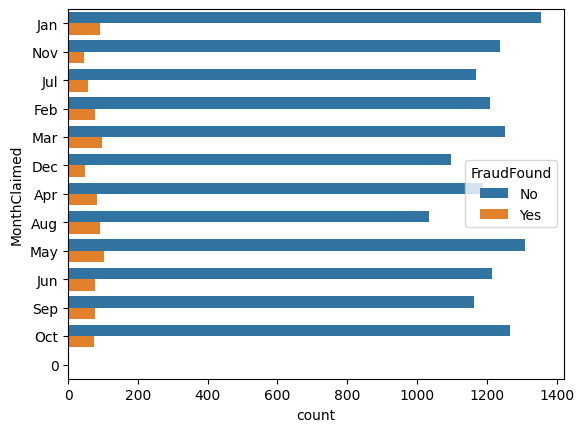

In [87]:
sns.countplot(data=df, y='MonthClaimed', hue='FraudFound')

<Axes: xlabel='count', ylabel='Sex'>

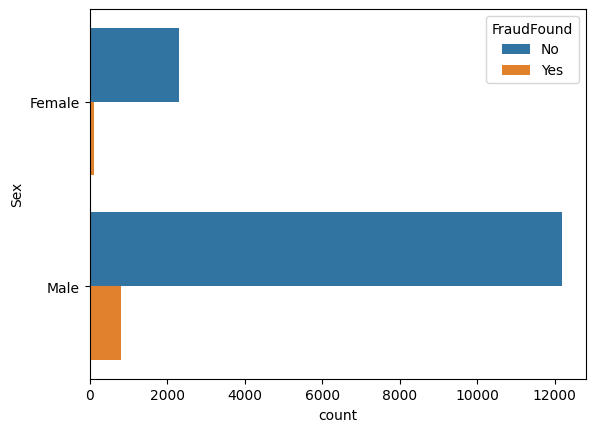

In [88]:
sns.countplot(data=df, y='Sex', hue='FraudFound')

<Axes: xlabel='count', ylabel='MaritalStatus'>

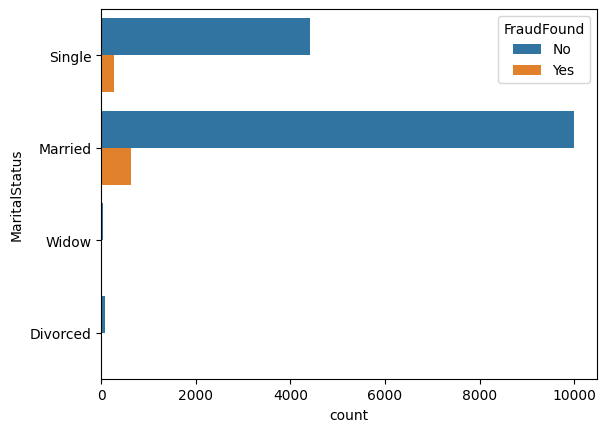

In [89]:
sns.countplot(data=df, y='MaritalStatus', hue='FraudFound')

<Axes: xlabel='count', ylabel='Fault'>

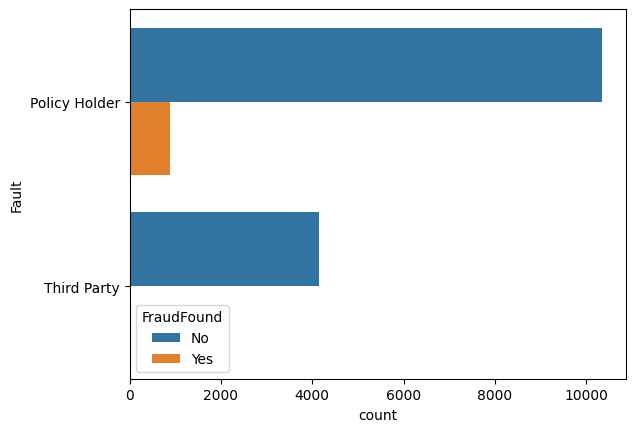

In [90]:
sns.countplot(data=df, y='Fault', hue='FraudFound')

<Axes: xlabel='count', ylabel='PolicyType'>

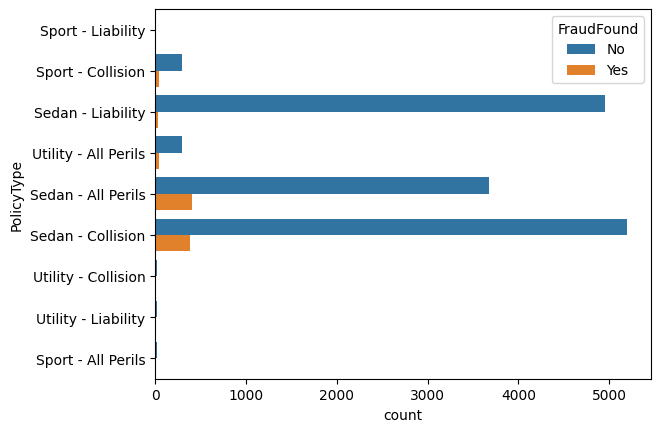

In [91]:
sns.countplot(data=df, y='PolicyType', hue='FraudFound')

<Axes: xlabel='count', ylabel='VehicleCategory'>

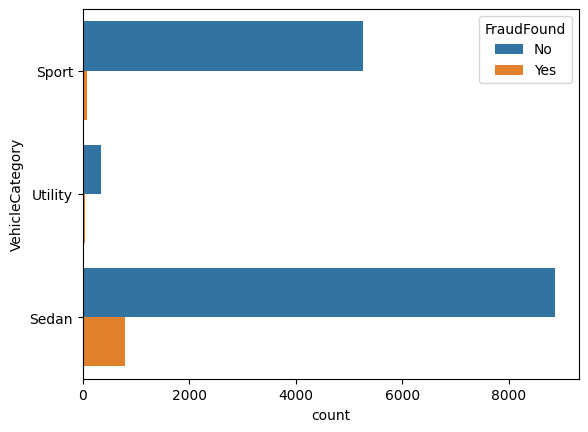

In [92]:
sns.countplot(data=df, y='VehicleCategory', hue='FraudFound')

<Axes: xlabel='count', ylabel='VehiclePrice'>

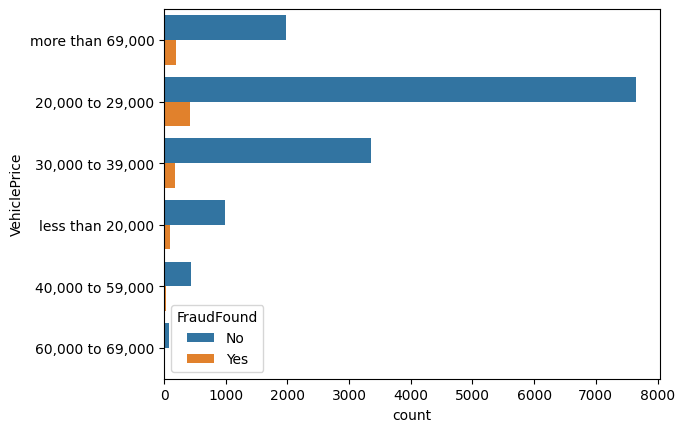

In [93]:
sns.countplot(data=df, y='VehiclePrice', hue='FraudFound')

<Axes: xlabel='count', ylabel='AgeOfVehicle'>

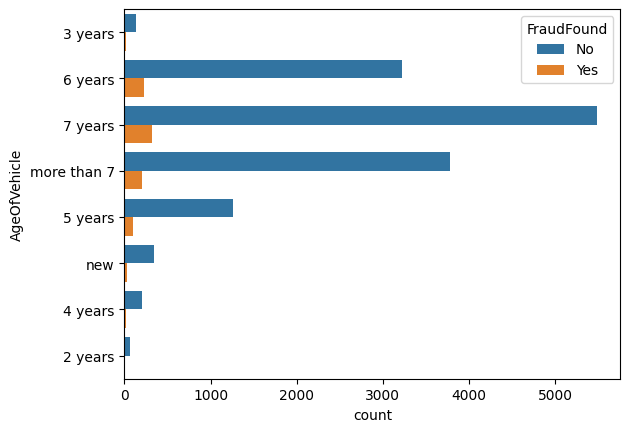

In [94]:
sns.countplot(data=df, y='AgeOfVehicle', hue='FraudFound')

<Axes: xlabel='count', ylabel='AgeOfPolicyHolder'>

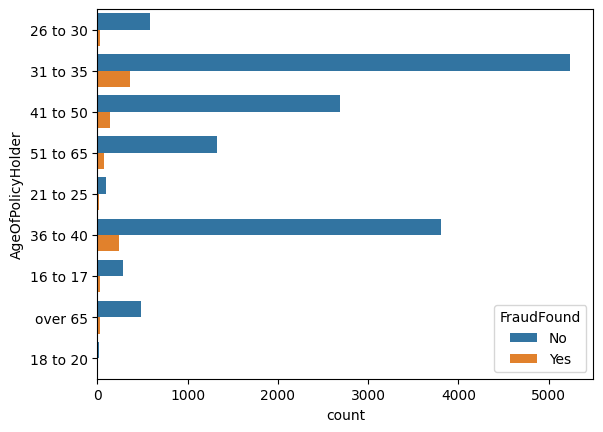

In [95]:
sns.countplot(data=df, y='AgeOfPolicyHolder', hue='FraudFound') # poliçe sahibinin yaşı

<Axes: xlabel='count', ylabel='PoliceReportFiled'>

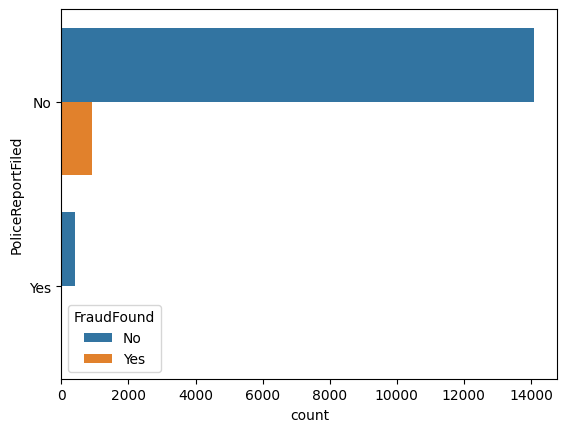

In [96]:
sns.countplot(data=df, y='PoliceReportFiled', hue='FraudFound') # poliçe raporu verilmiş mi

<Axes: xlabel='count', ylabel='WitnessPresent'>

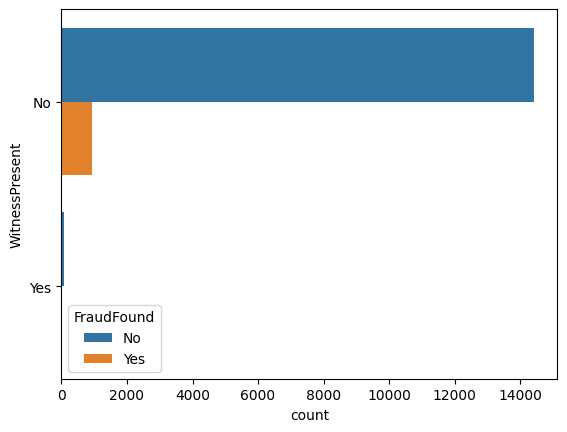

In [97]:
sns.countplot(data=df, y='WitnessPresent', hue='FraudFound') # Hileli durumda tanık var mı yok mu

<Axes: xlabel='count', ylabel='AgentType'>

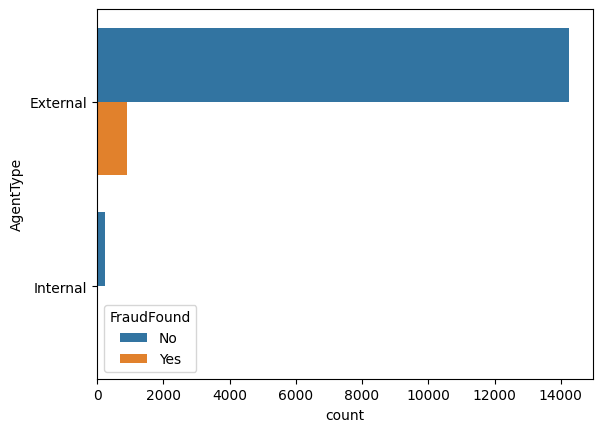

In [98]:
sns.countplot(data=df, y='AgentType', hue='FraudFound') # acenta tipi

<Axes: xlabel='count', ylabel='NumberOfSuppliments'>

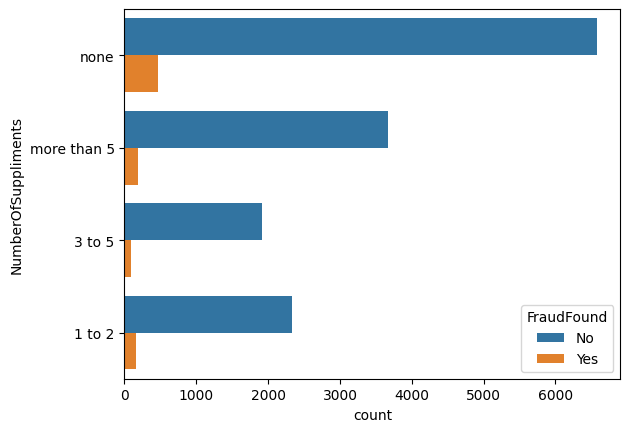

In [99]:
sns.countplot(data=df, y='NumberOfSuppliments', hue='FraudFound') # ek sigorta sayısı

<Axes: xlabel='count', ylabel='AddressChange-Claim'>

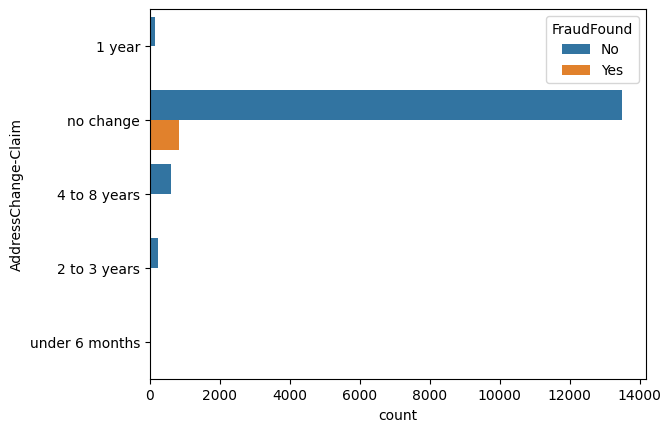

In [100]:
sns.countplot(data=df, y='AddressChange-Claim', hue='FraudFound') # adres değişikliği ve talep

<Axes: xlabel='count', ylabel='NumberOfCars'>

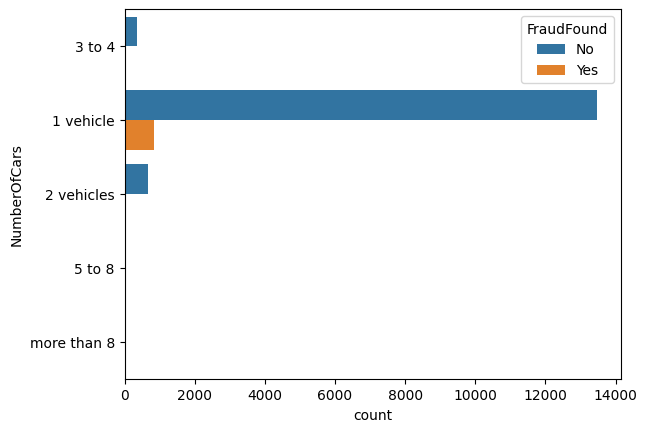

In [101]:
sns.countplot(data=df, y='NumberOfCars', hue='FraudFound') # araç sayısı

<Axes: xlabel='count', ylabel='Year'>

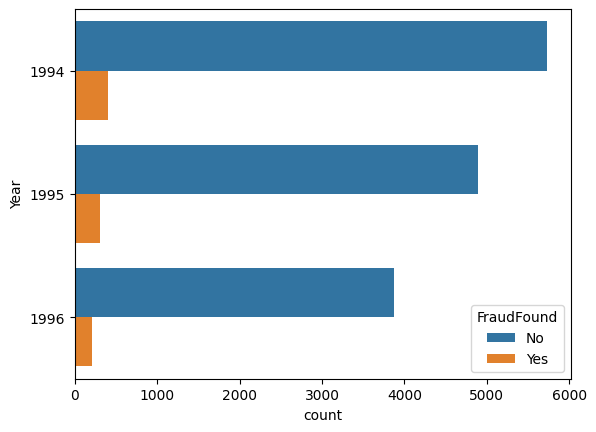

In [102]:
sns.countplot(data=df, y='Year', hue='FraudFound')

<Axes: xlabel='count', ylabel='BasePolicy'>

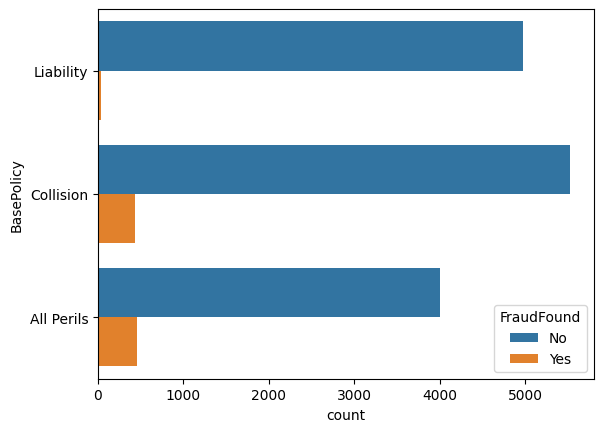

In [103]:
sns.countplot(data=df, y='BasePolicy', hue='FraudFound') # yüküm poliçesi, kaza poliçe, tüm tehlikeler poliçesi

Veri ön işleme

In [104]:
df.head(1)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No


In [105]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [106]:
#bu iki sütunun birbirine aynı veriyi tutuyor. ageofpolicyholder sütununu silebiliriz.
df[['AgeOfPolicyHolder','Age']]

,AgeOfPolicyHolder,Age
0,26 to 30,21
1,31 to 35,34
2,41 to 50,47
3,51 to 65,65
4,31 to 35,27
...,...,...
15415,31 to 35,35
15416,31 to 35,30
15417,26 to 30,24
15418,31 to 35,34


In [107]:
#BU iki sutun birbirine aynı veriyi tutuyor. basepolicy sütununu silebiliriz.
df[['BasePolicy', 'PolicyType']]

,BasePolicy,PolicyType
0,Liability,Sport - Liability
1,Collision,Sport - Collision
2,Collision,Sport - Collision
3,Liability,Sedan - Liability
4,Collision,Sport - Collision
...,...,...
15415,Collision,Sedan - Collision
15416,Liability,Sedan - Liability
15417,Collision,Sedan - Collision
15418,All Perils,Sedan - All Perils


In [108]:
#gereksiz sütunları silelim
unwanted_features = ['PolicyNumber', 'AgeOfPolicyHolder', 'BasePolicy', 'VehicleCategory']
#drop unwanted columns
df_new = df.drop(unwanted_features, axis=1)
df_drop = df_new.copy()


In [109]:
# Veri setindeki kategorik sütunları inceleyelim.
df_onehot = df_new.copy()


categorical_fetures = [x for x in df_onehot.columns if df_onehot[x].dtype != "int64"]
categorical_fetures

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'FraudFound']

In [110]:
categorical_fetures.remove('FraudFound') # FraudFound sütununu çıkar
categorical_fetures

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars']

In [111]:
# Kategorik sütunları one-hot encoding yapalım.
existing_categorical_features = [col for col in categorical_fetures if col in df_onehot.columns]
df_onehot = pd.get_dummies(df_onehot, columns=existing_categorical_features, drop_first=True)
df_onehot.head()



,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,FraudFound,Month_Aug,Month_Dec,...,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange-Claim_2 to 3 years,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
0,5,1,21,12,300,1,1994,No,False,True,...,False,True,False,False,False,False,False,True,False,False
1,3,4,34,15,400,4,1994,No,False,False,...,False,True,False,False,True,False,False,False,False,False
2,5,2,47,7,400,3,1994,No,False,False,...,False,True,False,False,True,False,False,False,False,False
3,2,1,65,4,400,2,1994,No,False,False,...,True,False,False,False,True,False,False,False,False,False
4,5,2,27,3,400,1,1994,No,False,False,...,False,True,False,False,True,False,False,False,False,False


In [112]:
# FraudFound sütununu 0 ve 1'e dönüştürelim.
df_onehot['FraudFound'].replace({"No":0,"Yes":1}, inplace=True)
df_onehot['FraudFound'].unique()

/tmp/ipykernel_113976/159591905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_onehot['FraudFound'].replace({"No":0,"Yes":1}, inplace=True)
/tmp/ipykernel_113976/159591905.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_onehot['FraudFound'].replace({"No":0,"Yes":1}, inplace=True)


array([0, 1])

In [113]:
cath_features = []
for name in df_drop.columns:
  if df_drop[name].dtype != "int64":
    cath_features.append(name)
cath_features

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'FraudFound']

Veri setini çevrim

In [114]:
#Düzenli dildeki etiketlerin sayısal değerlerine dönüştürülmesi
Month = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
DayOfWeek = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
Make = {'Honda':1, 'Toyota':2, 'Ford':3, 'Mazda':4, 'Chevrolet':5, 'Pontiac':6,
       'Accura':7, 'Dodge':8, 'Mercury':9, 'Jaguar':10, 'Nisson':11, 'VW':12, 'Saab':13,
       'Saturn':14, 'Porche':15, 'BMW':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19}
AccidentArea = {'Urban' : 0, "Rural": 1}
Sex = {'Female' : 0, "Male": 1}
MaritalStatus = {'Single':1,'Married':2,'Widow':3, 'Divorced':4}
Fault = {'Policy Holder':0, "Third Party":1}
PolicyType = {'Sport - Liability':0, 'Sport - Collision':1, 'Sedan - Liability':2,
       'Utility - All Perils':3, 'Sedan - All Perils':4, 'Sedan - Collision':5,
       'Utility - Collision':6, 'Utility - Liability':7, 'Sport - All Perils':8}
VehiclePrice = {'more than 69,000':0, '20,000 to 29,000':1, '30,000 to 39,000':2,
       'less than 20,000':3, '40,000 to 59,000':4, '60,000 to 69,000':5}
Days_Policy_Accident = {'more than 30':2, '15 to 30':1, 'none':0, '1 to 7':3, '8 to 15':4}
Days_Policy_Claim = {'more than 30':2, '15 to 30':1, '8 to 15':3, 'none':0}
PastNumberOfClaims = {'none':0, '1':1, '2 to 4':2, 'more than 4':3}
AgeOfVehicle = {'3 years':2, '6 years':5, '7 years':6, 'more than 7':7, '5 years':4, 'new':0,
       '4 years':3, '2 years':1}
PoliceReportFiled = {'No':0, "Yes":1}
WitnessPresent = {'No':0, "Yes":1}
AgentType = {'External':0, 'Internal':1}
NumberOfSuppliments = {'none':0, 'more than 5':3, '3 to 5':2, '1 to 2':1}
AddressChange_Claim = {'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,
       'under 6 months':1}
NumberOfCars = {'3 to 4':2, '1 vehicle' :0, '2 vehicles':1, '5 to 8':3, 'more than 8':4}
FraudFound = {'No':0, "Yes":1}

In [115]:
# Rename problematic columns to match dictionary keys
df_drop.rename(columns={
    'Days:Policy-Accident': 'Days_Policy_Accident',
    'Days:Policy-Claim': 'Days_Policy_Claim'
}, inplace=True)

# OLuşturulan sözlük ile kategorik sütunları sayısal değerlere dönüştürelim.
df_drop['Month'] = df_drop['Month'].replace(Month)
df_drop['MonthClaimed'] = df_drop['MonthClaimed'].replace(Month)
df_drop['DayOfWeekClaimed'] = df_drop['DayOfWeekClaimed'].replace(DayOfWeek)
df_drop['DayOfWeek'] = df_drop['DayOfWeek'].replace(DayOfWeek)
df_drop['Make'] = df_drop['Make'].replace(Make)
df_drop['AccidentArea'] = df_drop['AccidentArea'].replace(AccidentArea)
df_drop['Sex'] = df_drop['Sex'].replace(Sex)
df_drop['MaritalStatus'] = df_drop['MaritalStatus'].replace(MaritalStatus)
df_drop['Fault'] = df_drop['Fault'].replace(Fault)
df_drop['PolicyType'] = df_drop['PolicyType'].replace(PolicyType)
df_drop['VehiclePrice'] = df_drop['VehiclePrice'].replace(VehiclePrice)
df_drop['Days_Policy_Accident'] = df_drop['Days_Policy_Accident'].replace(Days_Policy_Accident)
df_drop['Days_Policy_Claim'] = df_drop['Days_Policy_Claim'].replace(Days_Policy_Claim)
df_drop['PastNumberOfClaims'] = df_drop['PastNumberOfClaims'].replace(PastNumberOfClaims)
df_drop['AgeOfVehicle'] = df_drop['AgeOfVehicle'].replace(AgeOfVehicle)
df_drop['PoliceReportFiled'] = df_drop['PoliceReportFiled'].replace(PoliceReportFiled)
df_drop['WitnessPresent'] = df_drop['WitnessPresent'].replace(WitnessPresent)
df_drop['AgentType'] = df_drop['AgentType'].replace(AgentType)
df_drop['NumberOfSuppliments'] = df_drop['NumberOfSuppliments'].replace(NumberOfSuppliments)
df_drop['AddressChange-Claim'] = df_drop['AddressChange-Claim'].replace(AddressChange_Claim)
df_drop['NumberOfCars'] = df_drop['NumberOfCars'].replace(NumberOfCars)
df_drop['FraudFound'] = df_drop['FraudFound'].replace(FraudFound)

/tmp/ipykernel_113976/1768236688.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_drop['Month'] = df_drop['Month'].replace(Month)
/tmp/ipykernel_113976/1768236688.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_drop['DayOfWeek'] = df_drop['DayOfWeek'].replace(DayOfWeek)
/tmp/ipykernel_113976/1768236688.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beh

In [116]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  int64 
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  int64 
 3   Make                  15420 non-null  int64 
 4   AccidentArea          15420 non-null  int64 
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  int64 
 9   MaritalStatus         15420 non-null  int64 
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  int64 
 12  PolicyType            15420 non-null  int64 
 13  VehiclePrice          15420 non-null  int64 
 14  RepNumber             15420 non-null  int64 
 15  Deductible            15420 non-null

In [117]:
# DayOfWeekClaimed ve MonthClaimed sütunlarını sayısallaştıralım
df_drop['DayOfWeekClaimed'] = df_drop['DayOfWeekClaimed'].astype(int)
df_drop['MonthClaimed'] = df_drop['MonthClaimed'].astype(int)

In [118]:
df_drop.info() # Sayısallaştırılmış tablo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int64
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int64
 3   Make                  15420 non-null  int64
 4   AccidentArea          15420 non-null  int64
 5   DayOfWeekClaimed      15420 non-null  int64
 6   MonthClaimed          15420 non-null  int64
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int64
 9   MaritalStatus         15420 non-null  int64
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int64
 12  PolicyType            15420 non-null  int64
 13  VehiclePrice          15420 non-null  int64
 14  RepNumber             15420 non-null  int64
 15  Deductible            15420 non-null  int64
 16  Driv

Modelleme
1. XGBoost Classification
2. KNN Classification
3. Logistic Regression

In [119]:
df_xgb = df_new.copy()
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehiclePrice          15420 non-null  object
 14  RepNumber             15420 non-null  int64 
 15  Deductible            15420 non-null

In [120]:
df_xgb['FraudFound'] = df_xgb['FraudFound'].replace({'No': 0, 'Yes': 1})

/tmp/ipykernel_113976/4218621489.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_xgb['FraudFound'] = df_xgb['FraudFound'].replace({'No': 0, 'Yes': 1})


In [121]:
from pandas.core.dtypes.common import is_string_dtype
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()
train_cats(df_xgb)

In [122]:
y = df_xgb[['FraudFound']]
X = df_xgb.drop('FraudFound', axis=1)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

Text(0.5, 1.0, 'Not-Fraud VS Fraud')

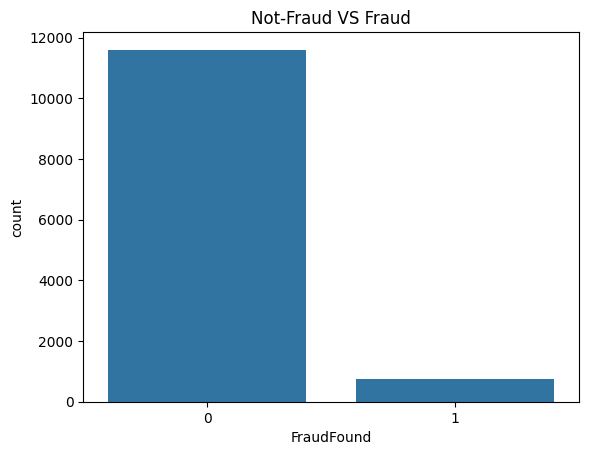

In [124]:
sns.countplot(x=y_train['FraudFound'])
plt.title("Not-Fraud VS Fraud")

In [125]:
import xgboost as xgb
XGB = xgb.XGBClassifier(eta=0.1, gamma=1, max_depth=5, enable_categorical=True,
                       tree_method='gpu_hist', n_estimators=1000,
                       reg_alpha=0.005)

In [126]:
XGB.fit(X_train, y_train)


/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [127]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGB, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWa

Scores: [0.94165316 0.94246353 0.94246353 0.94084279 0.94327391 0.94246353
 0.94241687 0.94403893 0.9432279  0.94079481]
Mean: 0.9423638961513536
Standard Deviation: 0.00098457576292112


/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [128]:
y_pred = XGB.predict(X_test)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.51      3084
weighted avg       0.94      0.94      0.91      3084



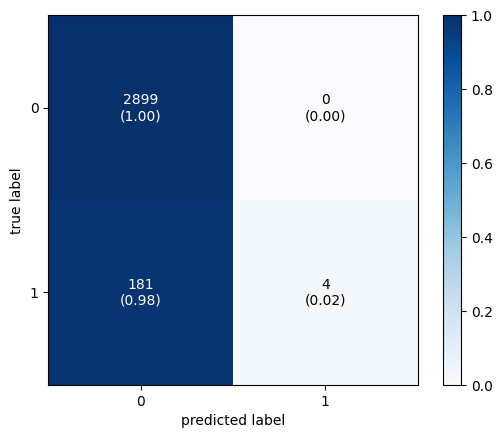

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [130]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=99)
X_undersam, y_undersam = ros.fit_resample(X_train, y_train) # SMOTE gibi bir yöntem sentetik olarak veri setini dengeliyor.

Text(0.5, 1.0, 'Fraud Vs Not-Fraud \n with Unsersampling')

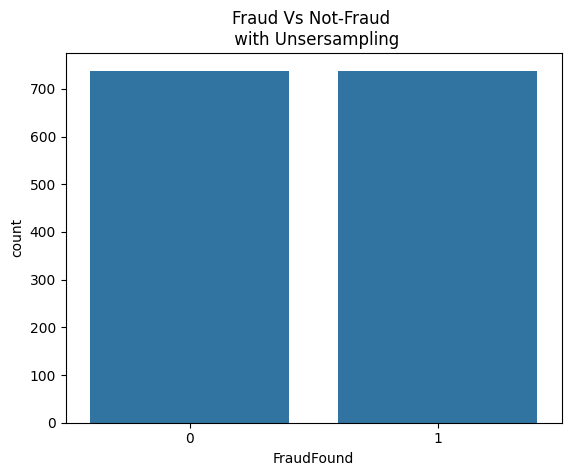

In [131]:
sns.countplot(x=y_undersam['FraudFound'])
plt.title("Fraud Vs Not-Fraud \n with Unsersampling")

In [132]:
import xgboost as xgb
XGB = xgb.XGBClassifier(eta=0.1, gamma=3, max_depth=10, enable_categorical=True,
                       tree_method='gpu_hist', n_estimators=1000,
                       reg_alpha=0.005, validate_parameters=True)
XGB.fit(X_undersam, y_undersam)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/plotting.py:91: UserWarning: [10:55:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  importance = booster.get_booster().get_score(


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

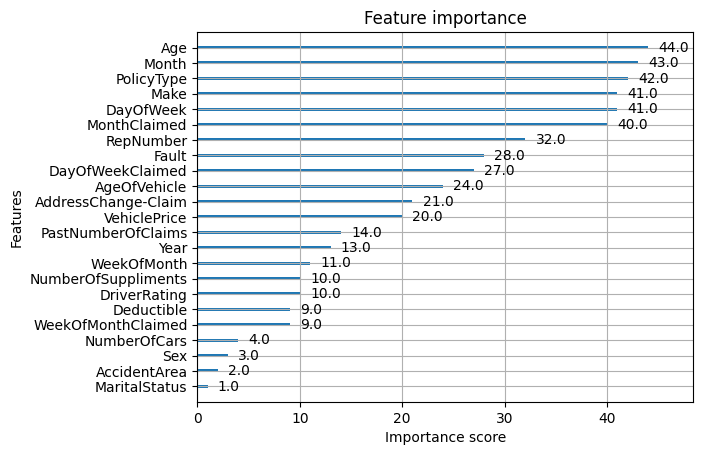

In [133]:
xgb.plot_importance(XGB) # Özelliklerin önem sırasını gösterir. Özellik çıkartımı.

In [134]:
scores = cross_val_score(XGB, X_undersam, y_undersam, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWa

Scores: [0.81756757 0.75       0.73648649 0.76351351 0.75675676 0.72972973
 0.76190476 0.73469388 0.73469388 0.78231293]
Mean: 0.7567659496230924
Standard Deviation: 0.025658851134719485


/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [135]:
y_pred_under = XGB.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2899
           1       0.13      0.92      0.23       185

    accuracy                           0.63      3084
   macro avg       0.56      0.77      0.50      3084
weighted avg       0.94      0.63      0.73      3084



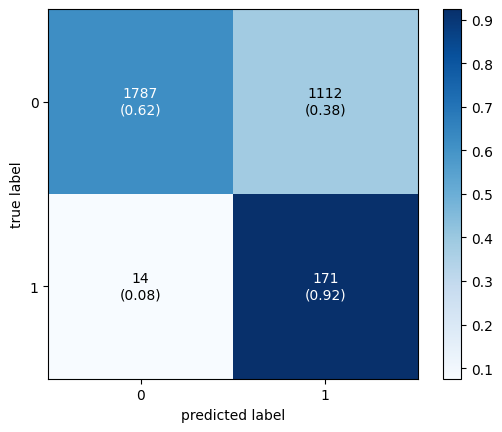

In [136]:
print(classification_report(y_test, y_pred_under))
cm1 = confusion_matrix(y_test,y_pred_under)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

Oversampling(aşırı örnekleme) Yöntemi
- az veri setinden rastgele örnekler seçer kopyalar ve çoğaltır. 
- aşırı öğrenme riski var.

In [137]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=99)
X_oversam, y_oversam = ros.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Fraud Vs Not-Fraud \n with Oversampling')

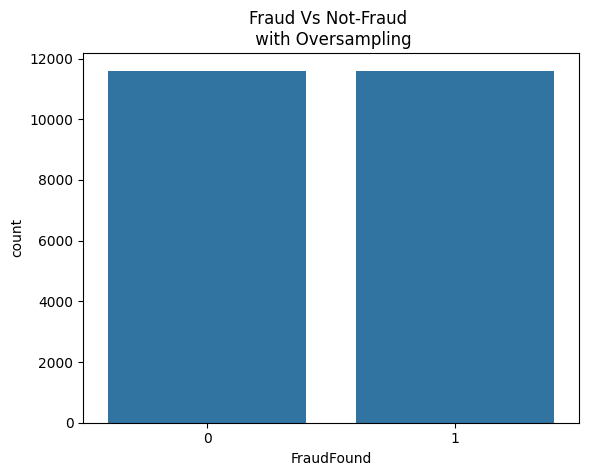

In [138]:
sns.countplot(x=y_oversam['FraudFound'])
plt.title("Fraud Vs Not-Fraud \n with Oversampling")

In [139]:
import xgboost as xgb
XGB = xgb.XGBClassifier(eta=0.1, gamma=3, max_depth=10, enable_categorical=True,
                       tree_method='gpu_hist', n_estimators=100,
                       reg_alpha=0.005)
XGB.fit(X_oversam, y_oversam)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [140]:
scores = cross_val_score(XGB, X_oversam, y_oversam, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWa

Scores: [0.93448276 0.94482759 0.94439655 0.94655172 0.94051724 0.94698276
 0.93143596 0.94049159 0.94652868 0.93445451]
Mean: 0.9410669358076461
Standard Deviation: 0.005482734037306297


/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [141]:
y_pred_over = XGB.predict(X_test)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2899
           1       0.21      0.45      0.29       185

    accuracy                           0.87      3084
   macro avg       0.59      0.67      0.61      3084
weighted avg       0.92      0.87      0.89      3084



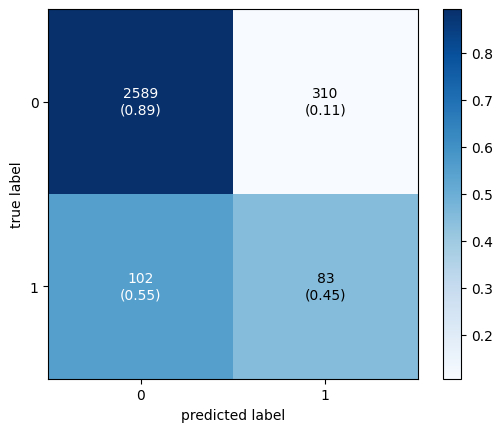

In [142]:
print(classification_report(y_test, y_pred_over))
cm1 = confusion_matrix(y_test,y_pred_over)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [143]:
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  category
 1   WeekOfMonth           15420 non-null  int64   
 2   DayOfWeek             15420 non-null  category
 3   Make                  15420 non-null  category
 4   AccidentArea          15420 non-null  category
 5   DayOfWeekClaimed      15420 non-null  category
 6   MonthClaimed          15420 non-null  category
 7   WeekOfMonthClaimed    15420 non-null  int64   
 8   Sex                   15420 non-null  category
 9   MaritalStatus         15420 non-null  category
 10  Age                   15420 non-null  int64   
 11  Fault                 15420 non-null  category
 12  PolicyType            15420 non-null  category
 13  VehiclePrice          15420 non-null  category
 14  RepNumber             15420 non-null  int64   
 15  De

SMOTE ile senstetik veri olşturma yöntemi

In [144]:
from imblearn.over_sampling import SMOTENC

In [145]:
sm = SMOTENC(k_neighbors=5,random_state=99, categorical_features=[0,2,3,4,5,6,8,9,11,12,13,
                                                   17,18,19,20,21,22,23,24,25,26])

In [146]:
X_smote, y_smote = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Fraud Vs Not-Fraud \n with SMOTENC')

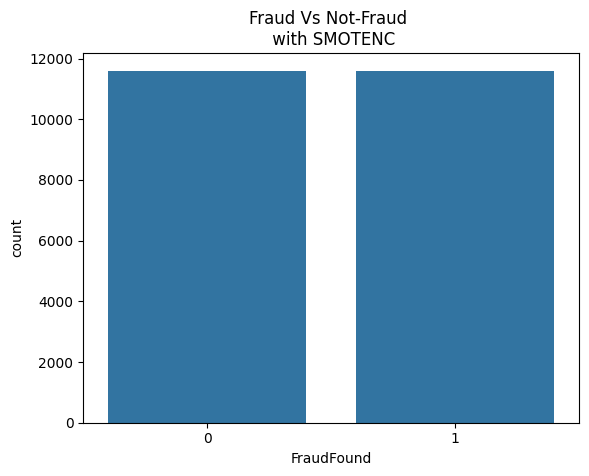

In [147]:
sns.countplot(x=y_smote['FraudFound'])
plt.title("Fraud Vs Not-Fraud \n with SMOTENC")

In [148]:
XGB = xgb.XGBClassifier(eta=0.1, gamma=3, max_depth=10, enable_categorical=True,
                       tree_method='gpu_hist', n_estimators=100,
                       reg_alpha=0.005)
XGB.fit(X_smote, y_smote)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [149]:
scores = cross_val_score(XGB, X_smote, y_smote, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:55:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWa

Scores: [0.68232759 0.99698276 0.99698276 0.99525862 0.99698276 0.99612069
 0.99655024 0.99698146 0.9956878  0.99611902]
Mean: 0.9649993680391369
Standard Deviation: 0.09422570279054739


/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [150]:
y_pred_smote = XGB.predict(X_test)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:55:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.43      0.03      0.06       185

    accuracy                           0.94      3084
   macro avg       0.69      0.51      0.51      3084
weighted avg       0.91      0.94      0.91      3084



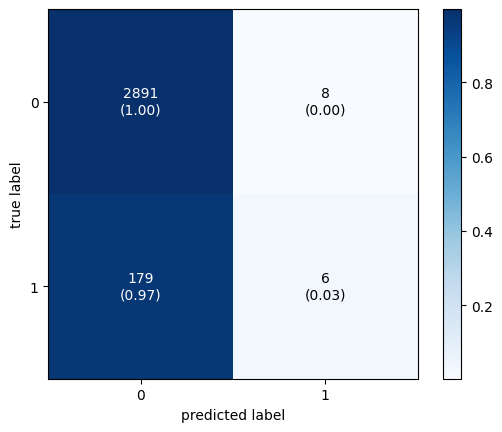

In [151]:
print(classification_report(y_test, y_pred_smote))
cm1 = confusion_matrix(y_test,y_pred_smote)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Smote yöntemi işe yaramadı.
Sentetik veri yaratımı ile sorun çözülemedi.


# Lojistik Regresyon Yöntemi

In [152]:
#Create X, y
y_onehot = df_onehot[['FraudFound']]
X_onehot = df_onehot.drop('FraudFound', axis=1)
y_onehot['FraudFound'].apply(lambda x: 0 if x=="No" else 1)
y_onehot = y_onehot.values

In [153]:
#train,test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_onehot, y_onehot, random_state = 99, stratify= y_onehot)

In [154]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaler_x = Scaler.fit(X_train_lr)
X_train_scaler = scaler_x.transform(X_train_lr)

In [155]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000, C=0.001)

In [156]:
lr.fit(X_train_lr, y_train_lr.ravel())

LogisticRegression(C=0.001, max_iter=5000)

In [157]:
X_test_scaler = scaler_x.transform(X_test_lr)

In [158]:
y_pred = lr.predict(X_test_scaler)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.53      0.69      3624
           1       0.11      0.89      0.19       231

    accuracy                           0.55      3855
   macro avg       0.55      0.71      0.44      3855
weighted avg       0.93      0.55      0.66      3855



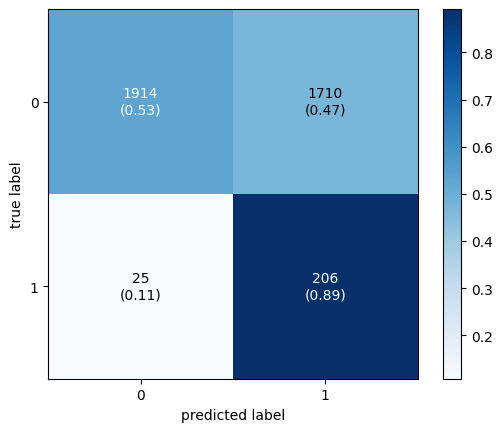

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
print(classification_report(y_test_lr, y_pred))
cm1 = confusion_matrix(y_test_lr,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
SMOTE ile desteklenmiş xgb'den daha iyi

In [160]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=99,k_neighbors=5)

In [161]:
X_smote_lr, y_smote_lr = smote.fit_resample(X_train_lr, y_train_lr)
lr.fit(X_smote_lr, y_smote_lr.ravel())

LogisticRegression(C=0.001, max_iter=5000)

In [162]:
y_pred_lr_smote = lr.predict(X_test_scaler)

/mnt/newdisk/dosyalar/Dosyalar/projeler/py/vehicle_insurance_fraud_dedection/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.53      0.69      3624
           1       0.10      0.80      0.18       231

    accuracy                           0.55      3855
   macro avg       0.54      0.67      0.43      3855
weighted avg       0.92      0.55      0.66      3855



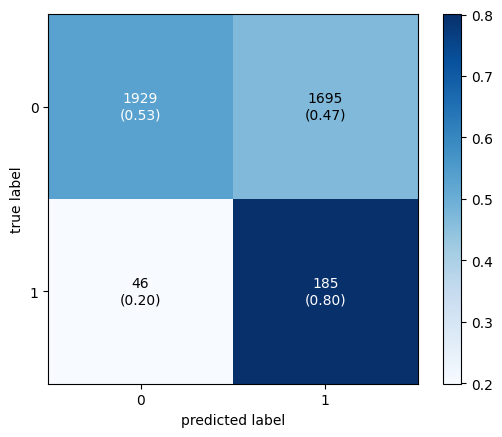

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
print(classification_report(y_test_lr, y_pred_lr_smote))
cm1 = confusion_matrix(y_test_lr,y_pred_lr_smote)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Smote ile Daha kötü bir sonuç

# YSA 

In [164]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [165]:

# Özellikleri ve hedefi ayır
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']

In [166]:

# Eğitim/test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [167]:

# Standardizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:

# MLPClassifier tanımlama ve eğitim
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu',
                    solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)

In [169]:
# Tahmin
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3624
           1       0.24      0.13      0.17       231

    accuracy                           0.92      3855
   macro avg       0.59      0.55      0.57      3855
weighted avg       0.90      0.92      0.91      3855



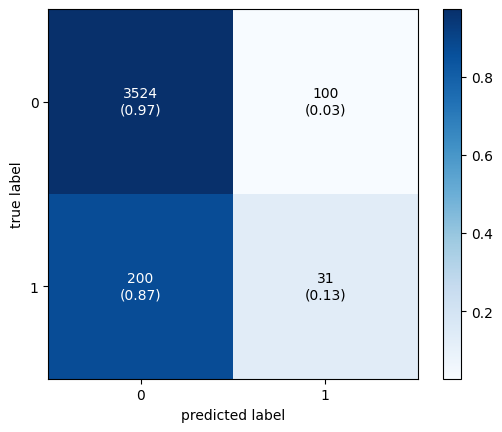

In [170]:
# Değerlendirme
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

# YSA SMOTE

In [171]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [172]:
# Özellikleri ve hedefi ayır
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']


In [173]:
# Eğitim/test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [174]:
# SMOTE ile veri dengeleme
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [175]:
# Standardizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)


In [176]:
# MLPClassifier tanımlama ve eğitim
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu',
                    solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train_sm)



MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)

In [177]:
# Tahmin
y_pred = mlp.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3624
           1       0.16      0.10      0.12       231

    accuracy                           0.92      3855
   macro avg       0.55      0.53      0.54      3855
weighted avg       0.90      0.92      0.91      3855



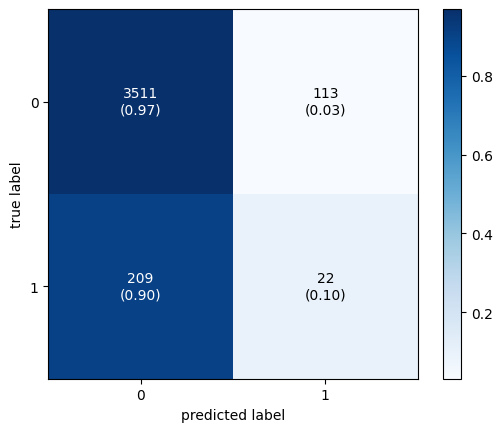

In [178]:
# Değerlendirme
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

YSA'da sentetik veri olmadan katmanlarda değişiklik yapalım.
# YSA KATMAN DEĞİŞİKLİĞİ

In [179]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [180]:

# Özellikleri ve hedefi ayır
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']

In [181]:
# Eğitim/test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [182]:

# Standardizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:

# MLPClassifier tanımlama ve eğitim
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32,16,8), activation='relu',
                    solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 8), max_iter=1000,
              random_state=42)

In [185]:
# Tahmin
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3624
           1       0.25      0.14      0.18       231

    accuracy                           0.92      3855
   macro avg       0.60      0.56      0.57      3855
weighted avg       0.90      0.92      0.91      3855



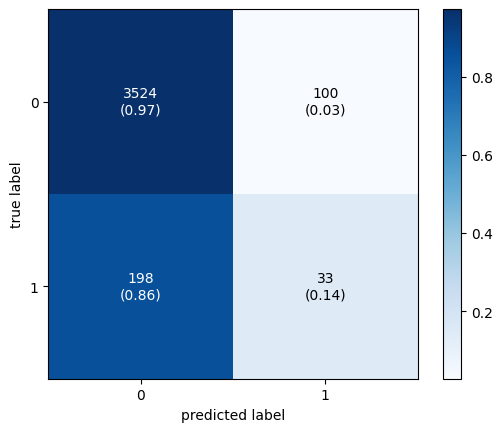

In [186]:
# Değerlendirme
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

AKTIVASYON FONKSİYONUNU TANH ile DEĞİŞTİRELİM

In [196]:

# MLPClassifier tanımlama ve eğitim
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32,16,8), activation='tanh',
                    solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(128, 64, 32, 16, 8),
              max_iter=1000, random_state=42)

In [197]:
# Tahmin
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3624
           1       0.16      0.08      0.11       231

    accuracy                           0.92      3855
   macro avg       0.55      0.53      0.53      3855
weighted avg       0.90      0.92      0.91      3855



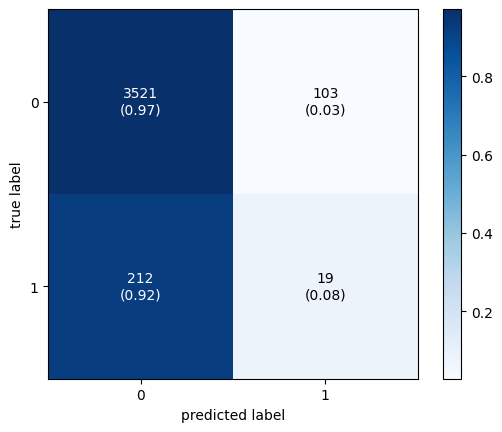

In [198]:
# Değerlendirme
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

son not: veri dağılımı sentetik yöntemler ile dengelenemedi. Dengesiz veri dağılımına rağmen yapılan takip edilen değişiklikler ile başarım oranı yüksek model çıktısı elde edilemedi.

under sampling yöntemi ile orijinal veriler üzerinde eğitim denemesi yapılmış ancak klasik makine öğrenmesi yöntemlerinde veri seti karmaşıklığından dolayı bir sonuç elde edilememiştir.

# AŞAĞI ÖRNEKLEME İLE YSA

In [203]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [204]:


# 1. Veriyi ayır (X, y)
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']

# 2. Azınlık ve çoğunluk sınıfı ayır
df_fraud = df_onehot[df_onehot['FraudFound'] == 1]
df_not_fraud = df_onehot[df_onehot['FraudFound'] == 0]


In [202]:

# 3. Çoğunluk sınıfından, azınlık kadar örnek al (undersampling)
df_not_fraud_sampled = df_not_fraud.sample(n=len(df_fraud), random_state=42)

# 4. Yeni dengeli veri setini oluştur
df_balanced = pd.concat([df_fraud, df_not_fraud_sampled])
X_balanced = df_balanced.drop('FraudFound', axis=1)
y_balanced = df_balanced['FraudFound']


In [205]:

# 5. Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, stratify=y_balanced, random_state=42)

# 6. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [206]:

# 7. YSA (MLPClassifier) eğitimi
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 8. Tahmin ve değerlendirme
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       231
           1       0.67      0.73      0.70       231

    accuracy                           0.68       462
   macro avg       0.68      0.68      0.68       462
weighted avg       0.68      0.68      0.68       462



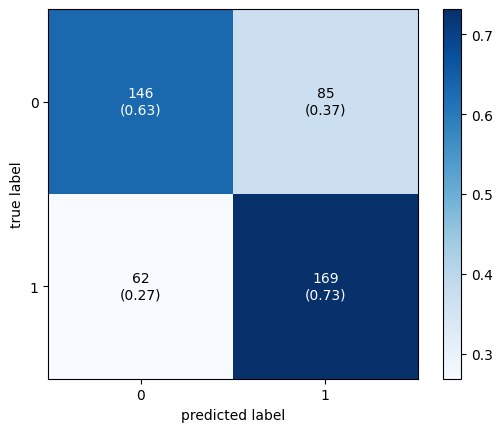

In [207]:

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

Aşağı örnekleme ile oluşturulan model görece iyi çalıştı şimdi bunu gerçek veri seti üzerinde test edelim.

In [208]:

# Özellikleri ve hedefi ayır
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']

In [209]:
# Eğitim/test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


# 6. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
#orijinal veri seti üzerinde tahmin
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.99      0.57      0.73      3624
           1       0.12      0.95      0.22       231

    accuracy                           0.59      3855
   macro avg       0.56      0.76      0.47      3855
weighted avg       0.94      0.59      0.70      3855



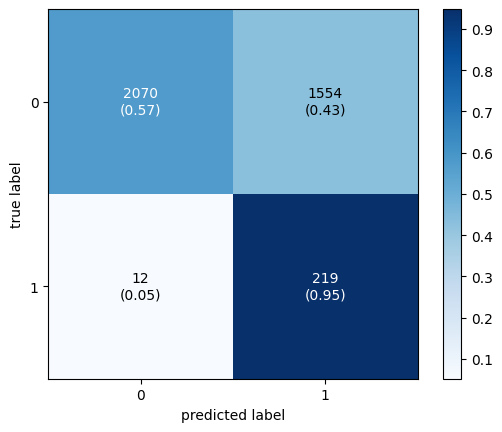

In [211]:

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

AŞAĞI ÖRNEKLEME YSA'DA İŞE YARADI GİBİ GÖZÜKÜYOR ANCAK YALNIZ HİLELİ VERİLERDE

Hilesiz verilerdeki problemi çözmek lazım bu aşamada aşağı ayarlanmış veri setindeki hilesizler hilelilerin 2 katı kadar alınabilir.

# Aşağı Örnekleme ile YSA act: identity, back: adam

In [212]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# 1. Veriyi ayır (X, y)
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']

# 2. Azınlık ve çoğunluk sınıfı ayır
df_fraud = df_onehot[df_onehot['FraudFound'] == 1]
df_not_fraud = df_onehot[df_onehot['FraudFound'] == 0]


In [243]:

# 3. Çoğunluk sınıfından, azınlık kadar örnek al (undersampling)
df_not_fraud_sampled = df_not_fraud.sample(n=len(df_fraud)*2, random_state=42)

# 4. Yeni dengeli veri setini oluştur
df_balanced = pd.concat([df_fraud, df_not_fraud_sampled])
X_balanced = df_balanced.drop('FraudFound', axis=1)
y_balanced = df_balanced['FraudFound']


In [244]:

# 5. Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, stratify=y_balanced, random_state=42)

# 6. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [271]:

# 7. YSA (MLPClassifier) eğitimi
mlp = MLPClassifier(hidden_layer_sizes=(64,32), activation='identity', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 8. Tahmin ve değerlendirme
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       462
           1       0.57      0.65      0.61       231

    accuracy                           0.72       693
   macro avg       0.69      0.70      0.69       693
weighted avg       0.73      0.72      0.72       693



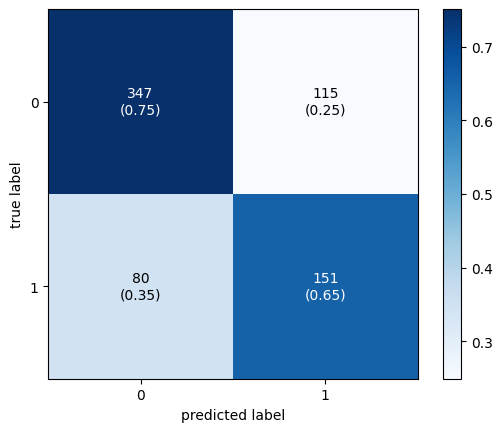

In [272]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

Mevcut sinir ağı için en iyi çıktı aktivasyon identity'de elde edildi. Ancak bu yanlış bir kullanım identity f(x) = x doğrusudur ve aktivasyon fonksiyonları doğrusal olmayan fonksiyonlar olmak durumundadır. 
Bu ilüzyona kanmamak gerek!

# YSA act:tanh

In [279]:

# 7. YSA (MLPClassifier) eğitimi
mlp_tanh = MLPClassifier(hidden_layer_sizes=(64,32), activation='logistic', solver='adam',
                    max_iter=1000, random_state=42)
mlp_tanh.fit(X_train_scaled, y_train)

# 8. Tahmin ve değerlendirme
y_pred = mlp_tanh.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       462
           1       0.56      0.60      0.58       231

    accuracy                           0.71       693
   macro avg       0.67      0.68      0.68       693
weighted avg       0.71      0.71      0.71       693



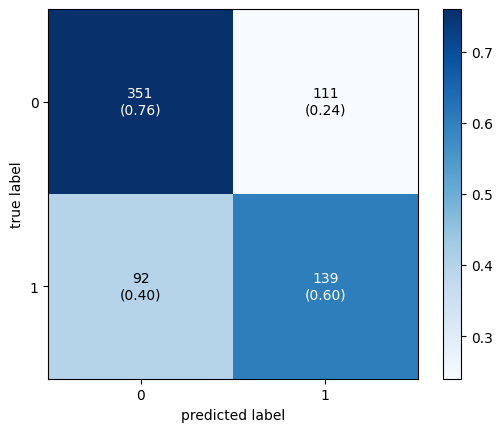

In [280]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

Bu kısımdan sonra ilerlememi tanh üzerinden yapacağım.
Şimdi katman sayısını arttırıp model performansını inceleyelim.

YSA - katman (64,32,32,16)

In [281]:

# 7. YSA (MLPClassifier) eğitimi
mlp = MLPClassifier(hidden_layer_sizes=(64,32,32,16), activation='logistic', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 8. Tahmin ve değerlendirme
y_pred = mlp.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       462
           1       0.55      0.53      0.54       231

    accuracy                           0.70       693
   macro avg       0.66      0.66      0.66       693
weighted avg       0.70      0.70      0.70       693



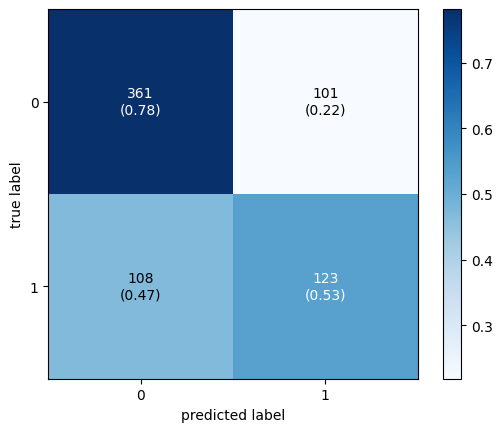

In [282]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

en iyi başarım bir önceki sinir ağında (mlp_tanh) elde edildi. act:tanh, opt:adam, layer(64,32)

mlp_tanh modelinin genel veri seti üzerindeki testi.

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      3624
           1       0.16      0.92      0.27       231

    accuracy                           0.71      3855
   macro avg       0.58      0.81      0.54      3855
weighted avg       0.94      0.71      0.78      3855



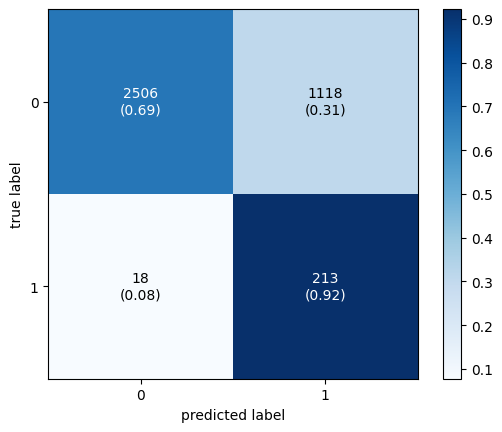

In [283]:

# Özellikleri ve hedefi ayır
X = df_onehot.drop('FraudFound', axis=1)
y = df_onehot['FraudFound']

# Eğitim/test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


# 6. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#orijinal veri seti üzerinde tahmin
y_pred = mlp_tanh.predict(X_test_scaled)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

Sonuç:
Hileli sonuçları tespit etmek için bir model hilesizleri tespit etmek için başka bir model kullanılabilir.
Son eğitilen model,
1) hileli verilere hileli diyor. +
2) hilesiz durumlara hileli diyor. -

Ele gelen durum standart ayarlar ile eğitilmiş ve hilesizlerin hilesiz olduğunu 0.97 doğrulukla bilen model tarafından yorumlansın.
böylece gerçekte hilesiz olup hileli tahmin edilen örnekler kümesi sonuç kümemizden def edilir. 

elimine edilen durumun ardından tam sonucu elde etmek için hemen yukarıdaki modele verilir durum. Duruma sahip olan model durumun hileli ise hileli olduğunu 0.92 doğruluk
oranı ile bilebilecektir. Hileli değilse 0.69 doğruluk oranı ile doğru bilecektir. 
